# Twitter Sentiment Analysis


Kaggle dataset: https://www.kaggle.com/kazanova/sentiment140

This dataset contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**This is a kaggle notebook to run on your local machine, take a part of dataset or RAM recommendation >= 16GB.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('Sentiment_analysis.csv',encoding='ISO-8859-1', names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df['target'].unique


<bound method Series.unique of 0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int64>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)

<Axes: xlabel='target', ylabel='count'>

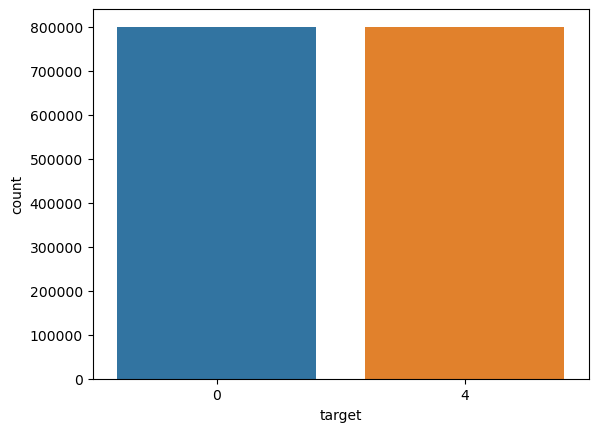

In [7]:
import seaborn as sns
sns.countplot(data=df, x='target')

In [8]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [9]:
import re
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_text(x):
    temp =" ".join([w for w in str(x).split() if w not in stop_words])
    translator =  str.maketrans("", "", punctuations_list)
    temp =  str(temp).translate(translator)
    temp = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',temp)
    temp = re.sub('[0-9]+', '', temp)
    #  remove special characters
    temp = re.sub(r"[^a-zA-Z0-9]+", ' ', temp)
    return temp.lower()


df['text'] = df['text'].apply(cleaning_text)

In [10]:
df.head()

,target,text
0,0,switchfoot httptwitpiccomyzl a s bummer you sh...
1,0,upset cant update facebook texting it might cr...
2,0,kenichan i dived many times ball managed save ...
3,0,whole body feels itchy like fire
4,0,nationwideclass no not behaving all im mad her...


In [11]:
# count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1200)
#vectorized_data = count_vectorizer.fit_transform(df['text']).toarray()

y= df['target']

In [12]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


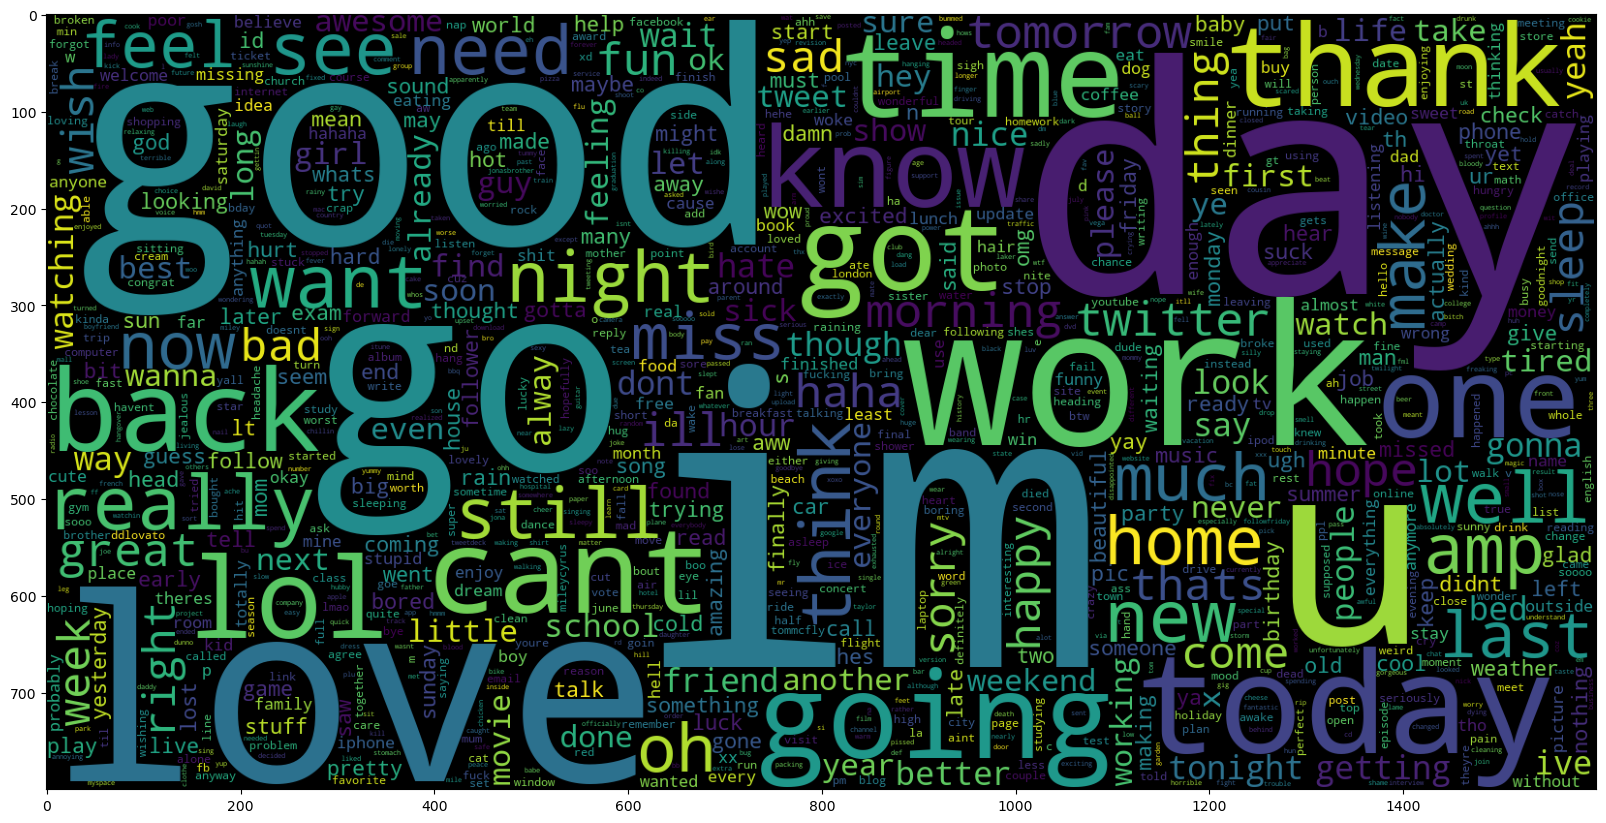

In [13]:
from wordcloud import WordCloud
data_neg = df['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
X=df['text']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [16]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [18]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           4       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



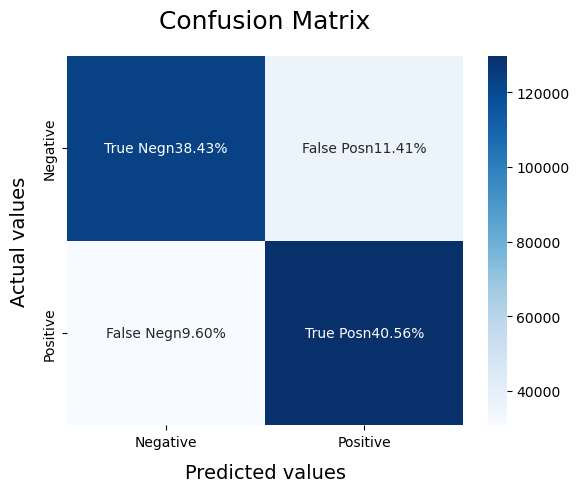

In [19]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.79      0.80      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



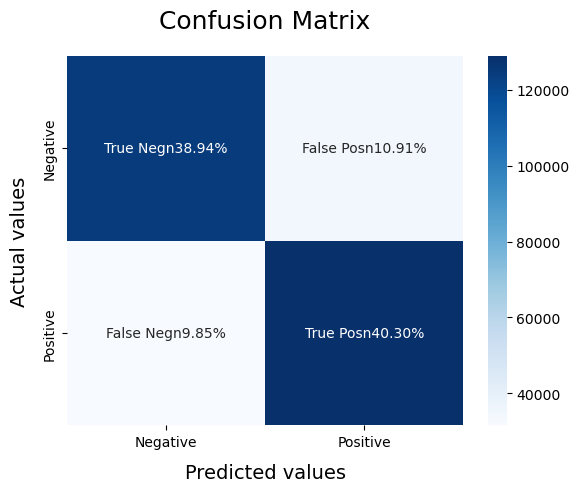

In [20]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           4       0.80      0.82      0.81    160506

    accuracy                           0.80    320000
   macro avg       0.81      0.80      0.80    320000
weighted avg       0.81      0.80      0.80    320000



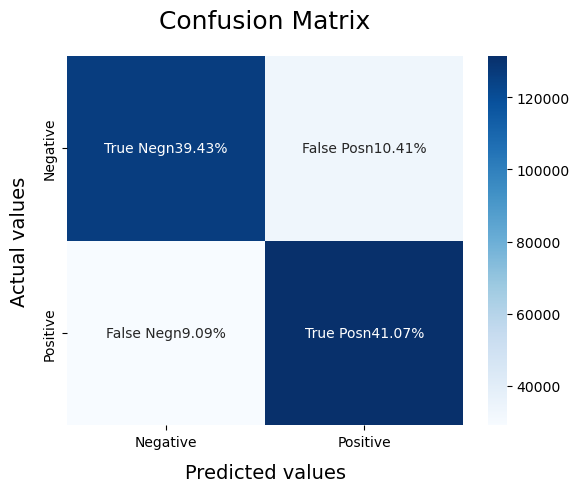

In [21]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           4       0.80      0.82      0.81    160506

    accuracy                           0.80    320000
   macro avg       0.81      0.80      0.80    320000
weighted avg       0.81      0.80      0.80    320000

The sentiment of the sentence is Negative.


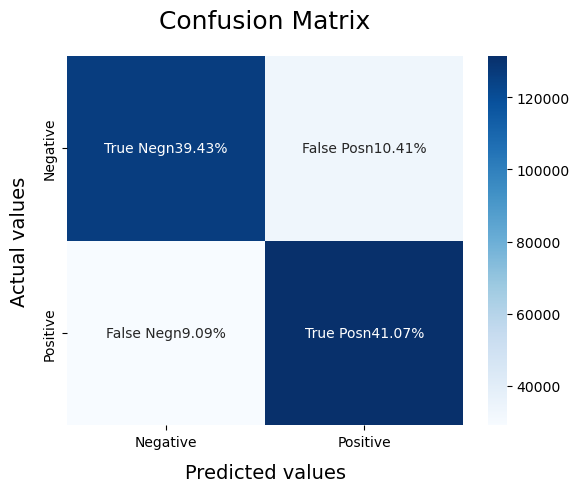

In [22]:
# Cell 9 (Output for LogisticRegression model):
LR_model = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
model_Evaluate(LR_model)

# New Cell for sentiment prediction
# Sample sentence to predict sentiment
sample_sentence = "The new movies is awful, i hated it"

# Clean the sample sentence using the same cleaning_text function
cleaned_sentence = cleaning_text(sample_sentence)

# Vectorize the cleaned sentence using the trained vectorizer
vectorised_sentence = vectoriser.transform([cleaned_sentence])

# Use the trained Logistic Regression model to predict sentiment
sentiment_prediction = LR_model.predict(vectorised_sentence)

# Print the predicted sentiment
if sentiment_prediction == 0:
    print("The sentiment of the sentence is Negative.")
else:
    print("The sentiment of the sentence is Positive.")


In [23]:
if sentiment_prediction == 0:
    print("The sentiment of the sentence is Negative.")
else:
    print("The sentiment of the sentence is Positive.")

The sentiment of the sentence is Negative.
